## Name: Sankalp Indish
## Class: TE-B
## Batch: B4
## Subject: DSBDAL
## Roll no: TEB75

## DSBDA Practical No A-2: Create an “Academic performance” dataset of students an# perform the following operations using Python.
- Scan all variables for missing values and inconsistencies. If there are missing values or inconsistencies, use any of the suitable techniques to deal with them. 
- Scan all numeric variables for outliers. If there are outliers, use any of techniques to deal with them.
- Apply data transformations on at least one of the variables. The purpose of transformation should be one of the following reasons: 
    - To change the scale for understanding of the variable 
    - To convert a non-linear relation into a linear to decrease the skewness and convert the distribution into a normal distribution


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.DataFrame() # Creating a dataframe for the operations

In [4]:
# Adding values and columns to the dataset
df['Rollo']=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
df['Maths']=[66, 85, 78, 60, 45, 56, 70, np.nan, 80, 110]
df['Science']=[90, 83, 46, 78, 84, 57, 68, 43, 67, 58]
df['English']=[79, 83, 57, 66, 49, 87, 73, 69, 52, 68]
df['Attendance']=[90, 80, 74, 86, '93%', 88, 69, 77, 95, 96]

In [5]:
df.head()

,Rollo,Maths,Science,English,Attendance
0,1,66.0,90,79,90
1,2,85.0,83,83,80
2,3,78.0,46,57,74
3,4,60.0,78,66,86
4,5,45.0,84,49,93%


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rollo       10 non-null     int64  
 1   Maths       9 non-null      float64
 2   Science     10 non-null     int64  
 3   English     10 non-null     int64  
 4   Attendance  10 non-null     object 
dtypes: float64(1), int64(3), object(1)
memory usage: 528.0+ bytes


In [7]:
df.describe()

,Rollo,Maths,Science,English
count,10.00000,9.000000,10.000000,10.000000
mean,5.50000,72.222222,67.400000,68.300000
std,3.02765,18.978789,16.304055,12.798003
min,1.00000,45.000000,43.000000,49.000000
25%,3.25000,60.000000,57.250000,59.250000
50%,5.50000,70.000000,67.500000,68.500000
75%,7.75000,80.000000,81.750000,77.500000
max,10.00000,110.000000,90.000000,87.000000


In [9]:
df.isnull().sum()

Rollo         0
Maths         1
Science       0
English       0
Attendance    0
dtype: int64

In [10]:
# Replcing Missing Value by the Mean [present in maths column]
df['Maths'].fillna(df['Maths'].mean(),inplace=True)

In [11]:
df.isnull().sum()

Rollo         0
Maths         0
Science       0
English       0
Attendance    0
dtype: int64

In [12]:
# As we see the missing value is handled

In [14]:
# We handle the 93% in a way that the original value is not lost

# Function to clean and standardize attendance values
def clean_attendance(value):
    if isinstance(value, str) and "%" in value:  # Check if value contains '%'
        return float(value.replace("%", ""))  # Remove '%' and convert to float
    elif isinstance(value, (int, float)):  # If it's already numeric
        return value
    else:
        return None  # Handle missing or unexpected data

# Apply the function to the Attendance column
df["Attendance"] = df["Attendance"].apply(clean_attendance)

print(df)

   Rollo       Maths  Science  English  Attendance
0      1   66.000000       90       79        90.0
1      2   85.000000       83       83        80.0
2      3   78.000000       46       57        74.0
3      4   60.000000       78       66        86.0
4      5   45.000000       84       49        93.0
5      6   56.000000       57       87        88.0
6      7   70.000000       68       73        69.0
7      8   72.222222       43       69        77.0
8      9   80.000000       67       52        95.0
9     10  110.000000       58       68        96.0


In [15]:
df.describe()

,Rollo,Maths,Science,English,Attendance
count,10.00000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,72.222222,67.400000,68.300000,84.800000
std,3.02765,17.893374,16.304055,12.798003,9.342852
min,1.00000,45.000000,43.000000,49.000000,69.000000
25%,3.25000,61.500000,57.250000,59.250000,77.750000
50%,5.50000,71.111111,67.500000,68.500000,87.000000
75%,7.75000,79.500000,81.750000,77.500000,92.250000
max,10.00000,110.000000,90.000000,87.000000,96.000000


In [18]:
df

,Rollo,Maths,Science,English,Attendance
0,1,66.000000,90,79,90.0
1,2,85.000000,83,83,80.0
2,3,78.000000,46,57,74.0
3,4,60.000000,78,66,86.0
4,5,45.000000,84,49,93.0
5,6,56.000000,57,87,88.0
6,7,70.000000,68,73,69.0
7,8,72.222222,43,69,77.0
8,9,80.000000,67,52,95.0
9,10,110.000000,58,68,96.0


<Axes: >

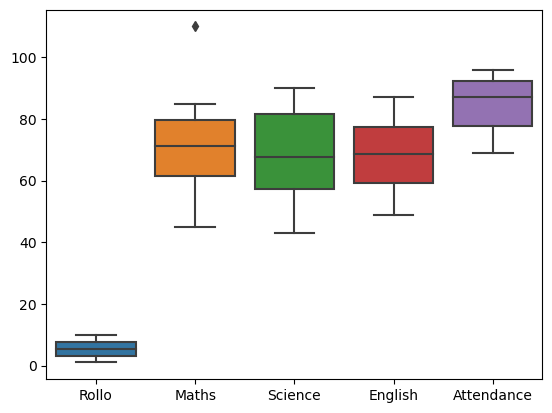

In [26]:
sns.boxplot(data=df) # For all columns at once 
# Another method would be using for loop and new figure for each

In [30]:
# Handle Outliers (using IQR method for MathS) Mostly used value with IQR is 1.
Q1 = df['Maths'].quantile(0.25)
Q3 = df['Maths'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.1 * IQR
upper_bound = Q3 + 1.1 * IQR

In [31]:
print(lower_bound)

41.7


In [32]:
print(upper_bound)

99.3


In [41]:
#Replace Outliers with upper or lower bound
df['Maths'] = np.where(df['Maths'] > upper_bound, upper_bound, np.where(df['Maths'] < lower_bound, lower_bound, df['Maths']))

In [42]:
# Applying Data Transformation on Attendance
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[['Attendance']]=scaler.fit_transform(df[['Attendance']])

In [43]:
df.describe()

,Rollo,Maths,Science,English,Attendance
count,10.00000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,71.152222,67.400000,68.300000,0.585185
std,3.02765,15.549749,16.304055,12.798003,0.346032
min,1.00000,45.000000,43.000000,49.000000,0.000000
25%,3.25000,61.500000,57.250000,59.250000,0.324074
50%,5.50000,71.111111,67.500000,68.500000,0.666667
75%,7.75000,79.500000,81.750000,77.500000,0.861111
max,10.00000,99.300000,90.000000,87.000000,1.000000


In [44]:
df.head()

,Rollo,Maths,Science,English,Attendance
0,1,66.0,90,79,0.777778
1,2,85.0,83,83,0.407407
2,3,78.0,46,57,0.185185
3,4,60.0,78,66,0.629630
4,5,45.0,84,49,0.888889


## Formula that works for MinMax Scaler

- xscale_value =  (x - xmin) / (xmax - xmin)         